In [9]:
import sklearn
import os
import pickle
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [10]:
layers = np.arange(0,12)
feature_type = ['random_features','all_features','all_random','cls_features']

In [11]:
x_ticks = ['random_obj','avg_obj','random','CLS']
y_labels = ['Token from primary object','Token from second object']
x_labels = ['Decoding primary object','Decoding secondary object','Decoding combination of both']

### Individual task accuracy plots for BLIP

<Figure size 640x480 with 0 Axes>

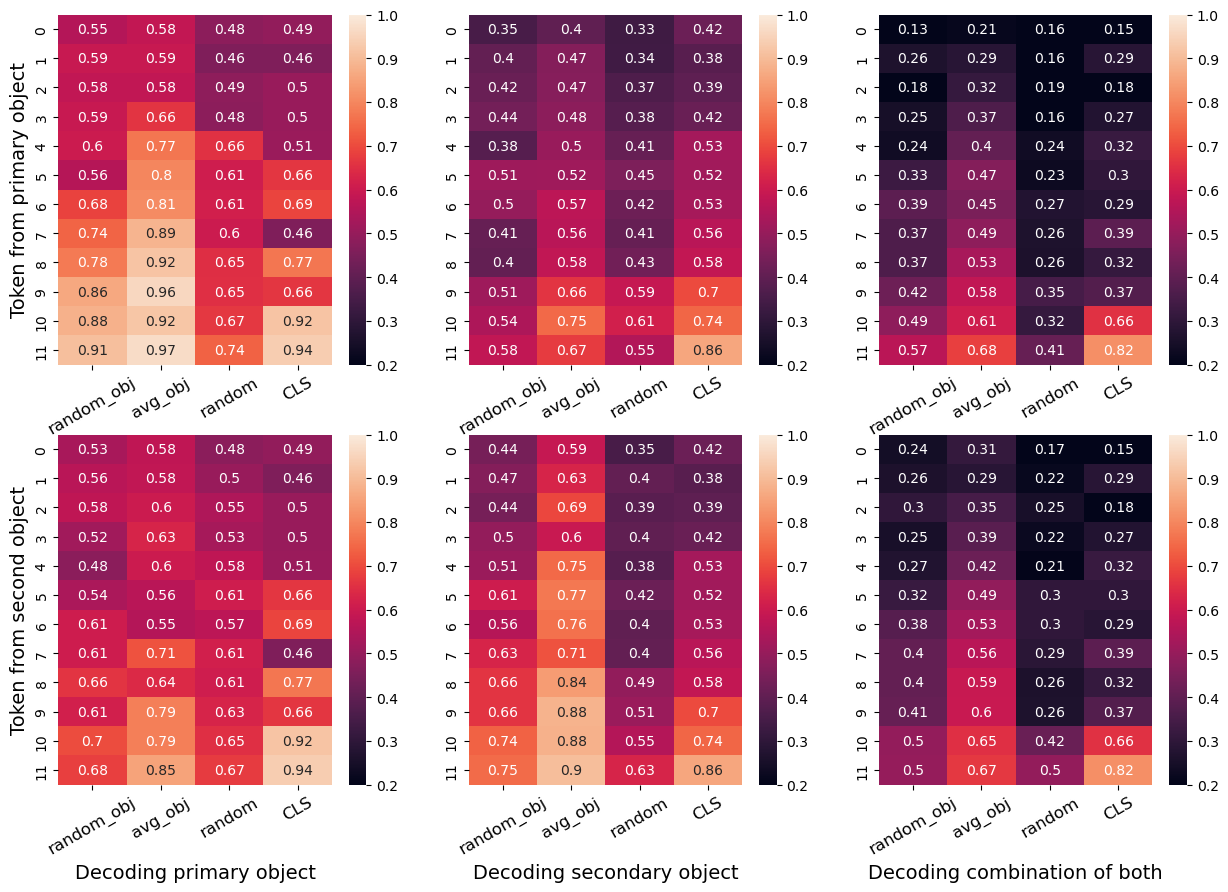

<Figure size 640x480 with 0 Axes>

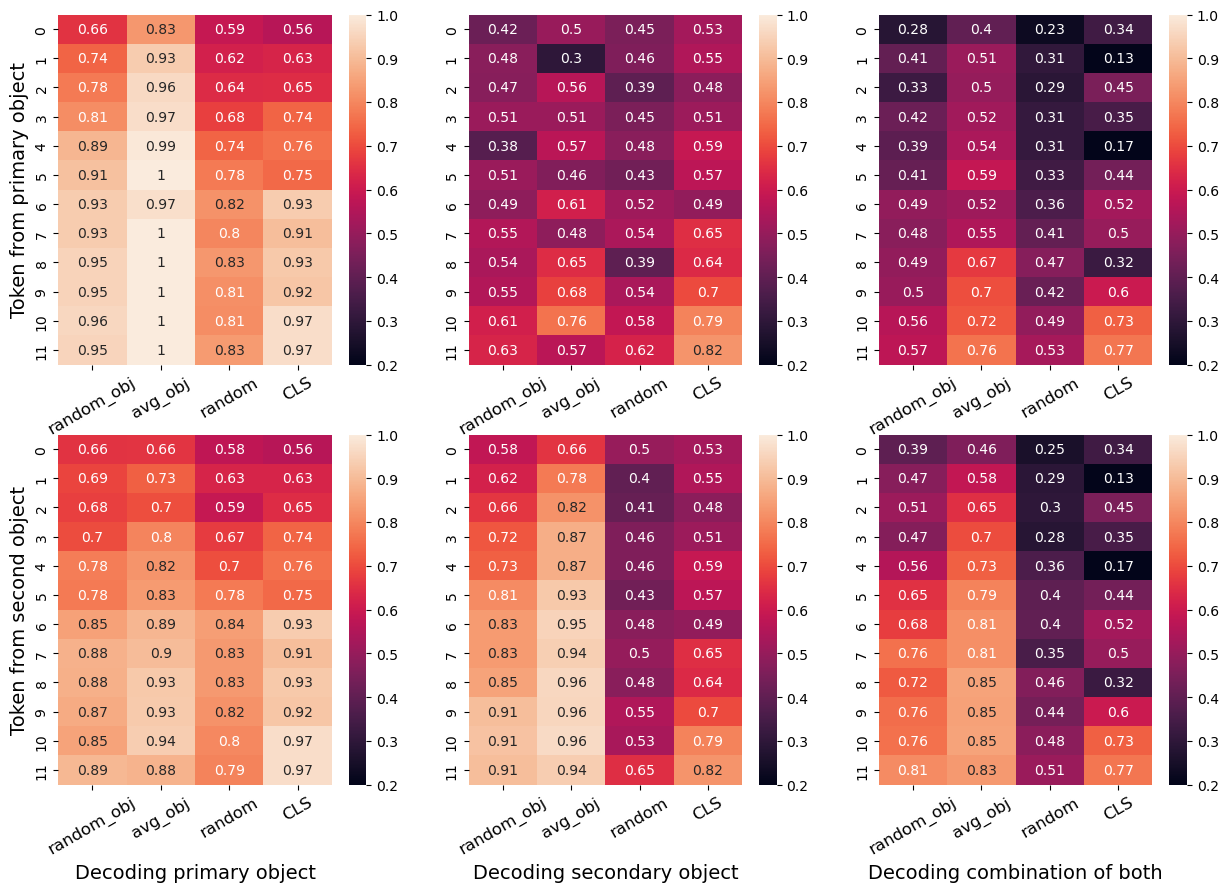

<Figure size 640x480 with 0 Axes>

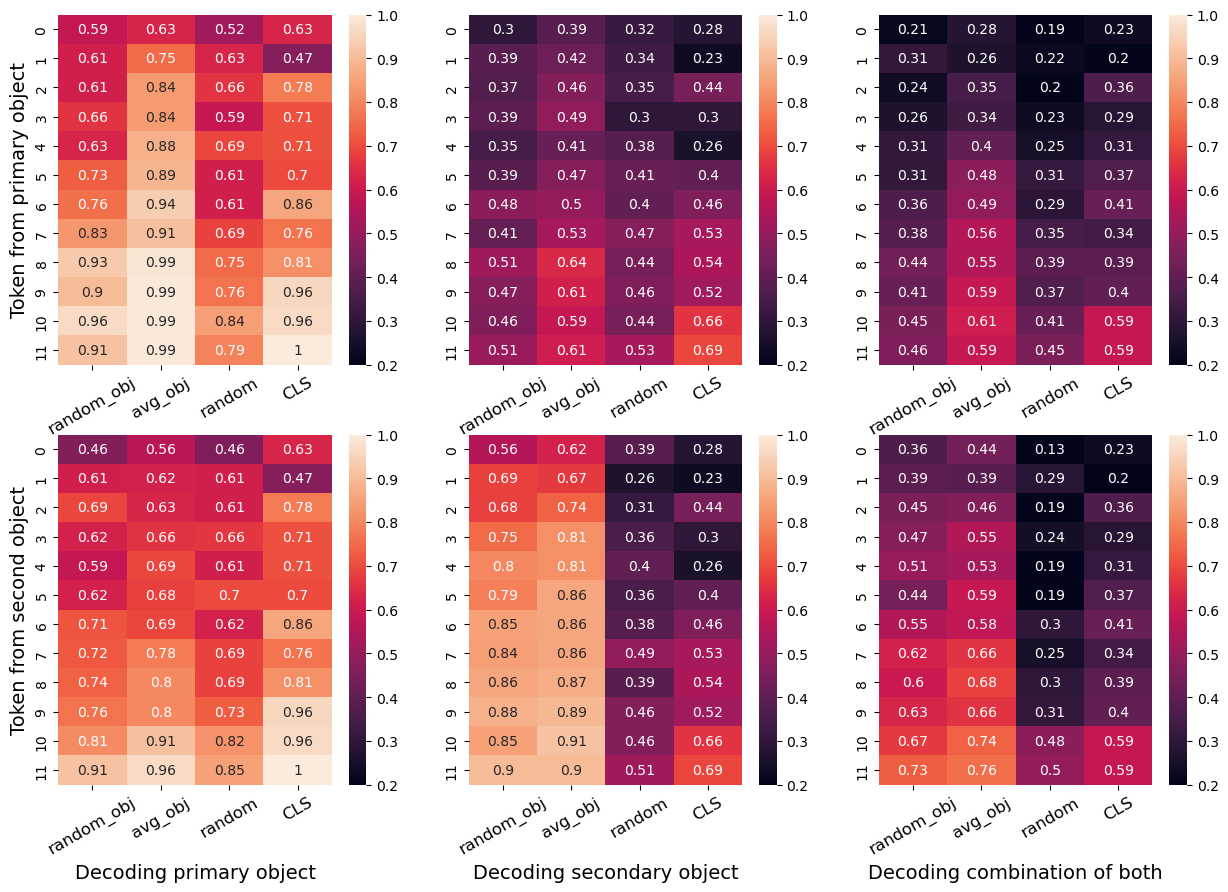

<Figure size 640x480 with 0 Axes>

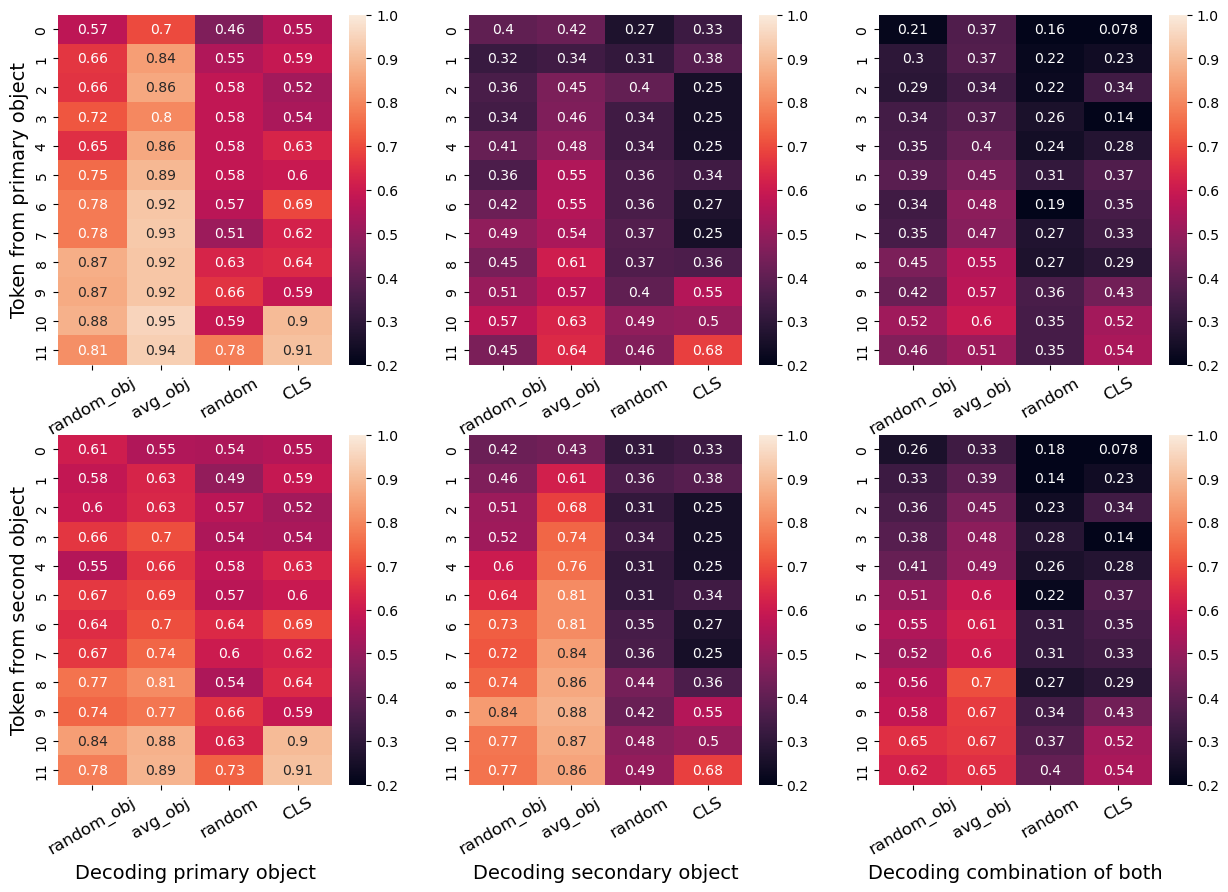

<Figure size 640x480 with 0 Axes>

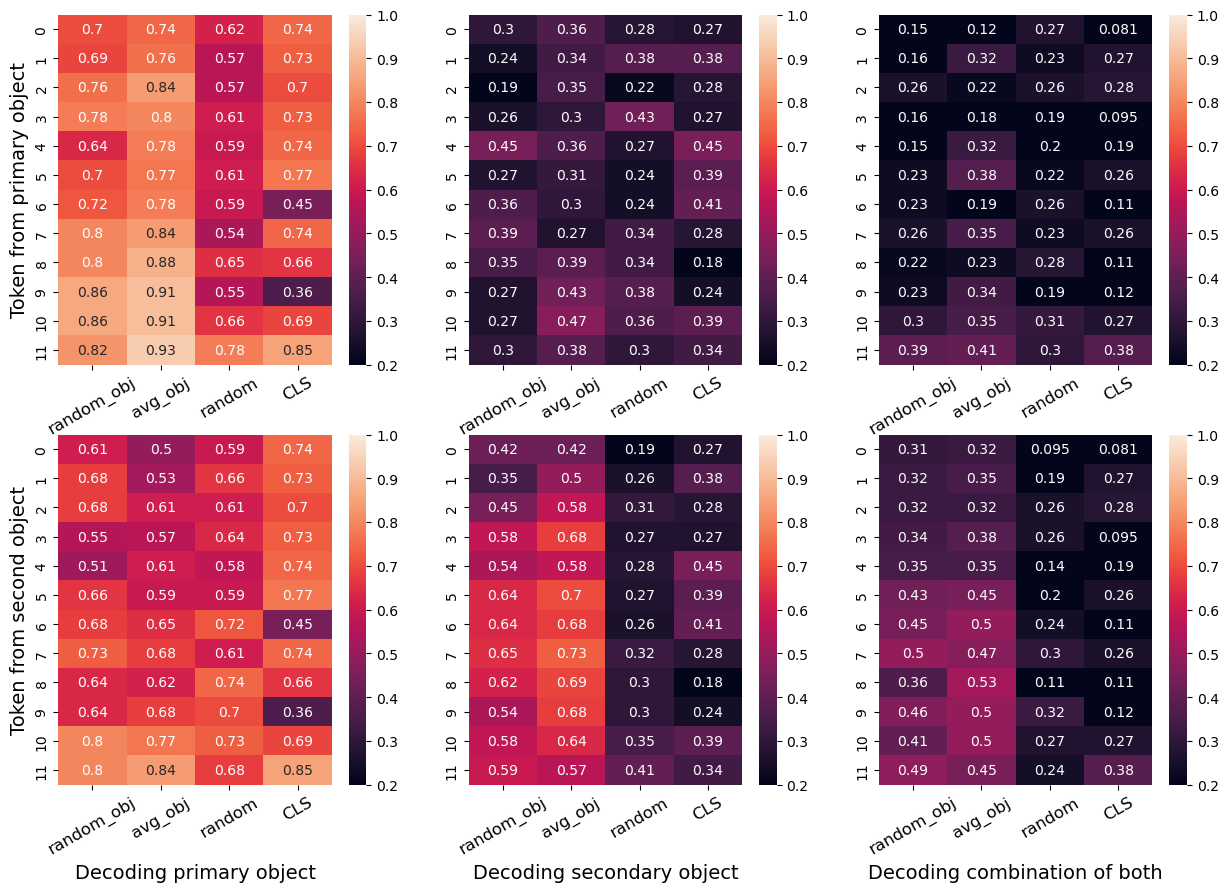

<Figure size 640x480 with 0 Axes>

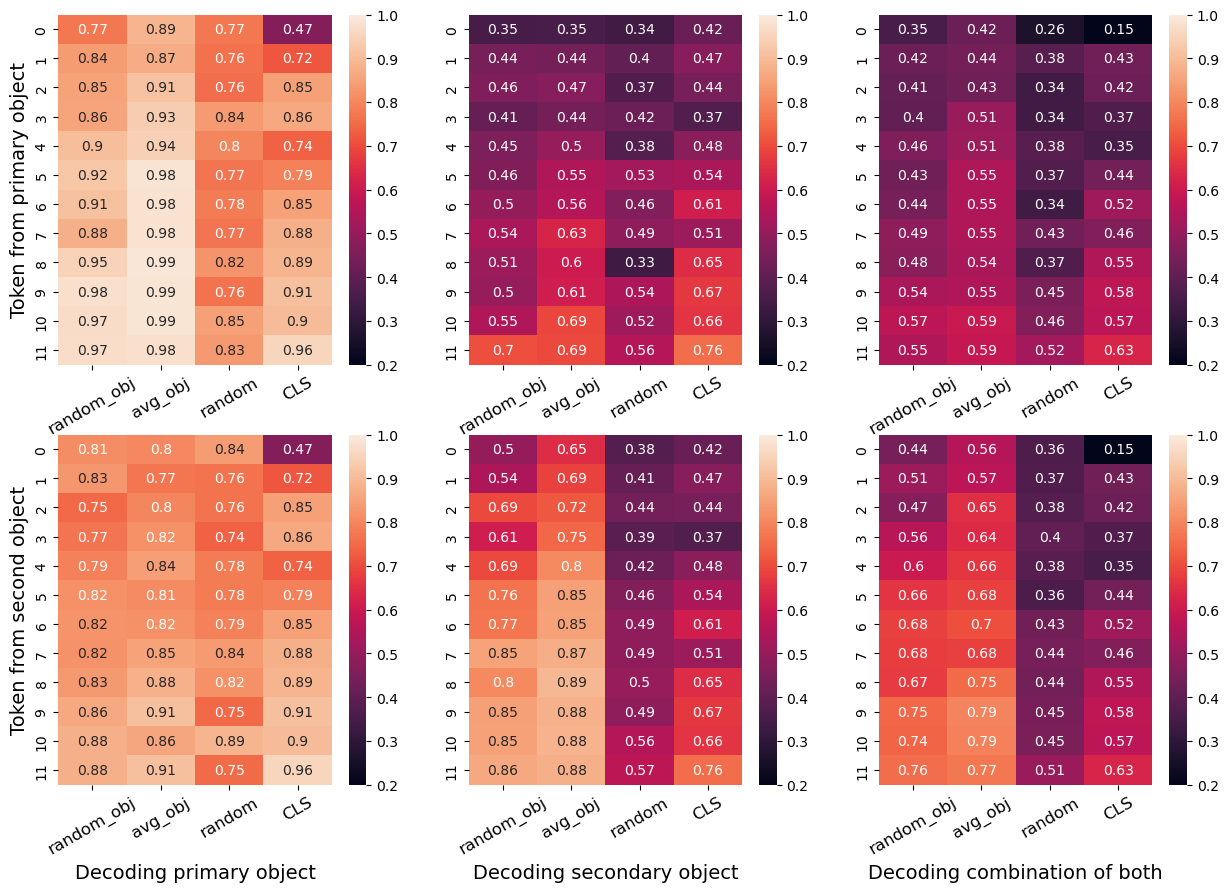

In [4]:
feature_type = ['random_features','all_features','all_random','cls_features']
for task in range(6):
    plt.figure()
    with open('Results_BLIP/task{}.pkl'.format(task),'rb') as f:
        results = pickle.load(f)
    fig, axs = plt.subplots(2, 3,figsize=(15, 10))
    for x in [1,2]:
        for y in [1,2,3]:
            table = np.zeros((len(layers),len(feature_type)))
            for i,l in enumerate(layers):
                for j,f in enumerate(feature_type):
                    table[i,j]= results[l][f][x][y]
            sns.heatmap(table,annot=True,ax = axs[x-1,y-1],vmin=0.20,vmax=1,cmap='rocket')
            axs[x-1,y-1].set_xticklabels(x_ticks,rotation=30,fontsize = 12)
            axs[1,y-1].set_xlabel(x_labels[y-1],fontsize = 14)
            axs[x-1,0].set_ylabel(y_labels[x-1],fontsize = 14)

### Accuracy plots averaged over 6 tasks

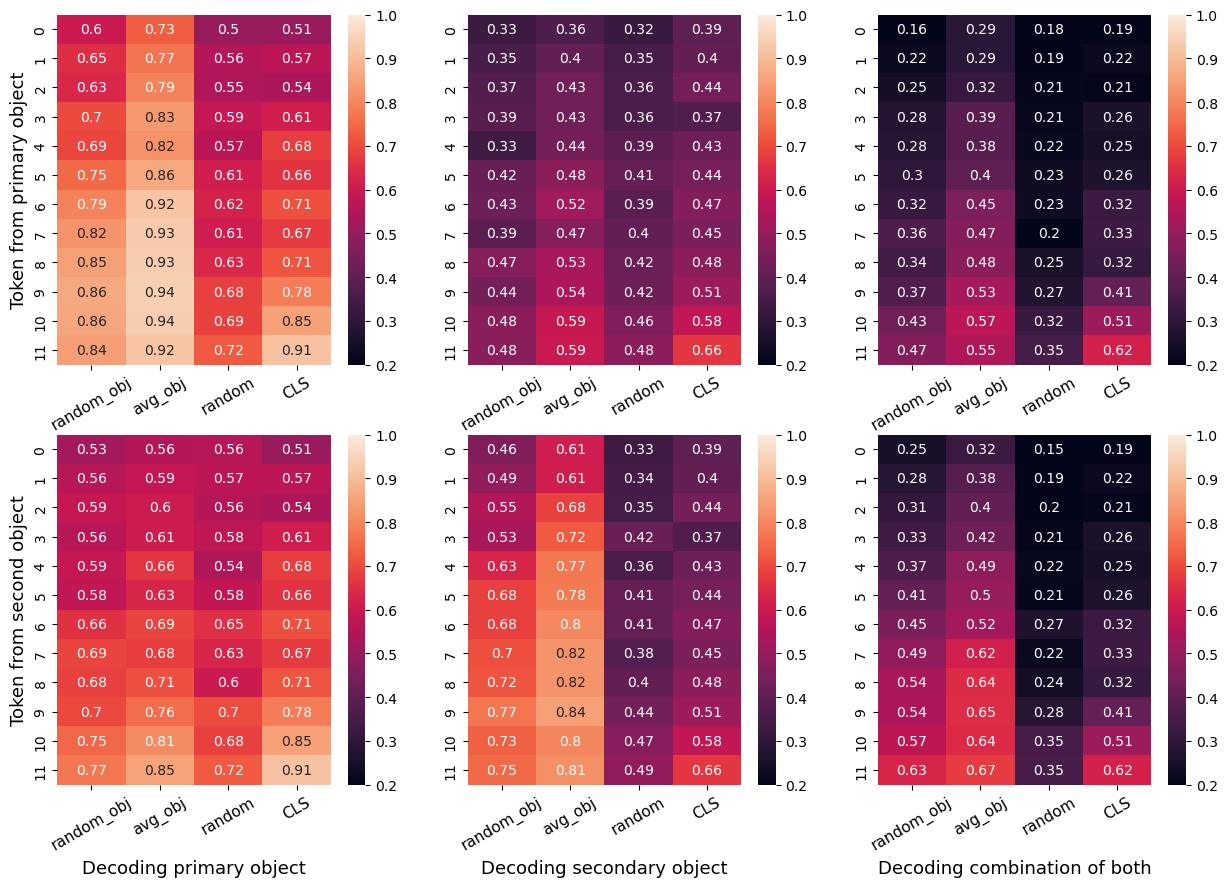

In [13]:
import matplotlib
results= {}
for task in range(6):
    with open('Results_Balanced_BLIP/task{}_results.pkl'.format(task),'rb') as f:
        results[task] = pickle.load(f)
fig, axs = plt.subplots(2, 3,figsize=(15, 10))
for x in [1,2]:
    for y in [1,2,3]:
        table = np.zeros((len(layers),len(feature_type)))
        for i,l in enumerate(layers):
            for j,f in enumerate(feature_type):
                for task in range(6):
                    table[i,j]= table[i][j]+results[task][l][f][x][y]
                table[i,j]/=6
        sns.heatmap(table,annot=True,ax = axs[x-1,y-1],vmin=0.20,vmax=1,cmap='rocket')
        axs[x-1,y-1].set_xticklabels(x_ticks,rotation=30,fontsize = 11)
        axs[1,y-1].set_xlabel(x_labels[y-1],fontsize = 13)
        axs[x-1,0].set_ylabel(y_labels[x-1],fontsize = 13)
fig.savefig('fig2a.pdf',dpi =300,bbox_inches='tight' )

## Caption Experiment

In [6]:
results={}
for task in range(6): 
    with open('Results_BLIP/task{}_caption.pkl'.format(task),'rb') as f:
        results[task] = pickle.load(f)        
table = np.zeros((2,2,3,6,len(layers),len(feature_type)))
avg_table = np.zeros((2,2,3,len(layers),len(feature_type)))
for cap in [True,False]:
    for x in [1,2]:
        for y in [1,2,3]:
            for i,l in enumerate(layers):
                for j,f in enumerate(feature_type):
                    for task in range(6):
                        table[int(cap),x-1,y-1,task,i,j] = results[task][l][f][x][cap][y]            
            table_avg = np.nanmean(table[int(cap),x-1,y-1],axis=0)
            avg_table[int(cap),x-1,y-1] = table_avg

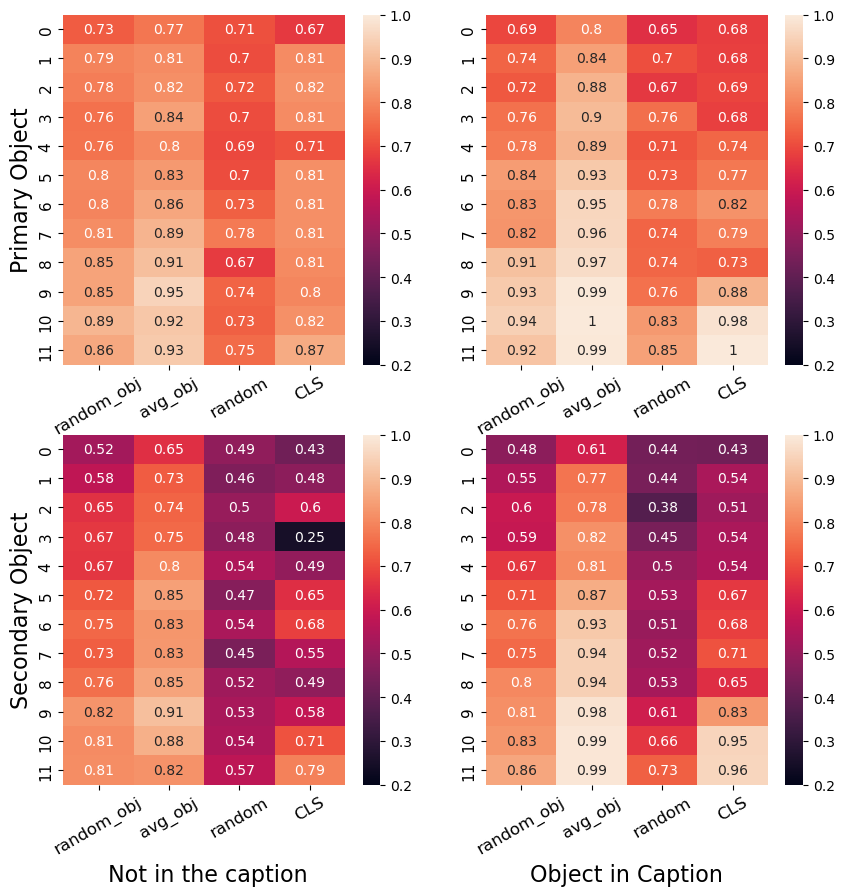

In [8]:
labelsx = [' Not in the caption','Object in Caption']
labelsy = ['Primary Object','Secondary Object']
fig, axs = plt.subplots(2, 2,figsize=(10, 10))
for obj in [0,1]:
    for t in [1,0]:
        sns.heatmap(avg_table[t,obj,obj],annot=True,ax = axs[obj,t],vmin=0.20,vmax=1,cmap='rocket')
        axs[obj,t].set_xticklabels(x_ticks,rotation=30,fontsize = 12)
        axs[obj,t].yaxis.set_tick_params(labelsize=11)
        axs[1,t].set_xlabel(labelsx[t],fontsize=16)
        axs[obj,0].set_ylabel(labelsy[obj],fontsize=16)
fig.savefig('fig5a.jpeg',dpi =300 )